In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [10]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [11]:
Base.classes.keys()

['measurement', 'station']

In [12]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
session = Session(engine)

In [15]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [16]:
results = []

In [20]:
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

In [19]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

In [21]:
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

In [28]:
#print(df)

In [35]:
#print(df.to_string(index=False))

In [24]:
df = df.sort_index()

In [29]:
#print(df.to_string(index=False))

<AxesSubplot:xlabel='date'>

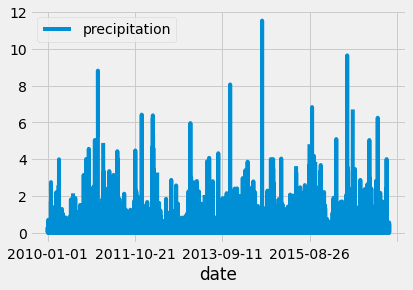

In [26]:
df.plot()

In [27]:
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [30]:
session.query(func.count(Station.station)).all()

[(9,)]

In [32]:
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

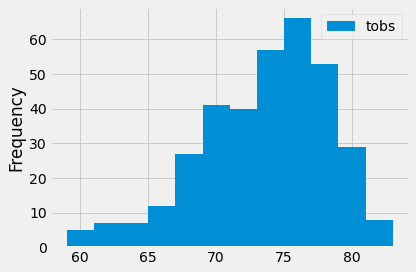

In [34]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results,columns = ['tobs'])
#print(df)
df.plot.hist(bins=12)
#df.plot.hist(bins=20)
plt.tight_layout()